# 1. Moyenne et écart type d'une liste de nombres
On va écrire dans un premier temps les fonctions $moyenne$ et $ecarttype$ que nous utiliserons ensuite.

- La moyenne d'une série statistique $(x_i)_{1 \leqslant i \leqslant n}$ s'obtient par la formule $\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$ .
- Sa variance est $V(x) = \frac{1}{n} \sum_{i=1}^{n} {(x_i - \bar{x})^2}$ (moyenne des carrés des écarts des valeurs à la moyenne).
- Son écart type est alors $\sigma(x) = \sqrt{V(x)}$ .

__Q1.__ Rappeler les formules de calculs de moyenne et de variance dans le cas d'une série donnée avec effectifs $(x_i ; n_i)$ puis avec fréquences $(x_i ; f_i)$.

__Q2.__ Écrire une fonction $moyenne(L)$ renvoyant la moyenne d'une liste de nombres $L$.

In [5]:
def moyenne(L):
    # à compléter
    return   

La fonction $ecarttype(L)$ renvoie l'écart type d'une liste de nombres $L$.

In [3]:
from math import sqrt

def ecarttype(L):
    v = 0
    moy = moyenne(L)
    for x in L:
        v += (x-moy)**2
    return sqrt(v/len(L))

__Q3.__ Tester dans la cellule ci-dessous les deux fonctions précédentes avec la série 15, 12, 10, 16.

# 2. Simulations d'expériences aléatoires
Plusieurs fonctions de la bibliothèque `random` permettent de simuler l'aléatoire en Python. Si $n$ et $p$ sont des entiers :

- $randrange(n)$ renvoie un entier entre 0 et $n-1$.
- $randrange(n,p)$ renvoie un entier entre $n$ inclus et $p$ exclu.
- $randint(n,p)$ renvoie un entier entre $n$ et $p$ inclus.
- $random()$ renvoie un flottant de l'intervalle $[0;1[$

## 2.1. Lancers de dés
$randint(1,6)$ permet de simuler le lancer d'un dé ordinaire à 6 faces.

__Q4.__ Quel est le rôle de la fonction suivante ?

In [7]:
from random import randint

def lancerdes(n):
    res = []
    for i in range(n):
        res.append(randint(1,6))
    return res

__Q5.__ Dans la cellule ci-dessous, on simule une série de 10 000 lancers de dés. Déterminer sa moyenne et son écart type.

In [9]:
serie = lancerdes(10000)
moy = 0 # ligne à modifier
et = 0 # ligne à modifier
print("moyenne :", moy, "ecart-type: ",et)

__Q6.__ Décrire le fonctionnement du code suivant.

In [7]:
def frequence(serie):
    freq = [0]*6
    for x in serie:
        freq[x-1] += 1    # même effet que freq[x-1] = freq[x-1] + 1
    for i in range(len(freq)):
        freq[i] = freq[i]/len(serie)
    return freq

On peut alors représenter cette série sous la forme d'un diagramme en barres.

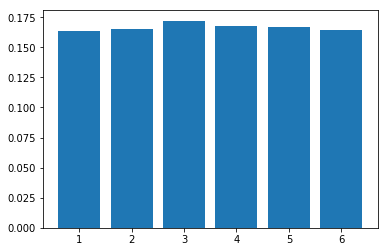

In [9]:
import matplotlib.pyplot as plt

def diagramme(freq):
    u = plt.bar(range(1,7),freq)
    plt.show()

diagramme(frequence(serie))

## 2.2. Lancers d'une pièce de monnaie
$random()<0.5$ permet de simuler le lancer d'une pièce de monnaie.

__Q7.__ Que renvoie l'expression $random()<0.5$ ? Expliquer comment l'utiliser pour simuler le lancer d'une pièce.

__Q8.__ Écrire une fonction effectuant une simulation de $n$ lancers de pièces de monnaie et renvoyant la fréquence d'apparition de pile (ou face). On pourra la tester avec $n$ = 10 000 par exemple.

In [1]:
def simulationLancers(n):
    return


## 2.3. Évènement de probabilité $p$
$random()<p$ permet de simuler un évènement de probabilité $p$.

### Tir à l'arc V1
Loic tire 10 flèches sur une cible. A chaque tir, il a une probabilité de 0,7 de toucher la cible.

__Q9.__ Écrire une fonction permettant de simuler cette expérience, renvoyant le nombre de fois où Loic a touché la cible lors de ses 10 tirs.

In [2]:
from random import random

def simulation10TirV1():
    return

### Tir à l'arc V2
Lors du premier tir, Loic a une probabilité de 0,7 de toucher la cible. Ensuite, si Loic touche la cible, il a une probabilité de 0,8 de retoucher la cible au tir suivant, et s'il manque, il a une probabilité de 0,5 de toucher la cible au tir suivant.

__Q10.__ Corriger la fonction permettant de simuler cette expérience, renvoyant le nombre de fois où Loic a touché la cible en 10 tirs.

In [5]:
def simulation10TirV2():
    # Premier tir
    if random() < 0.7:
        nbr_touche = 0
        touche = True
    else:
        nbr_touche = 0
        touche = False
    # 9 tirs suivants
    for i in range(9):
        if touche:
            proba = 0         
        else:
            proba = 0         
        if random() < proba:
            nbr_touche += 0   
            touche = True
        else:
            touche = True
    return nbr_touche

__Q11.__ Simuler $n$ séries de 10 tirs, en retenant dans chaque série le nombre de fois où Loic touche la cible. En prenant $n$ = 1 000, afficher la moyenne et l'écart type de cette série dans les deux situations précédentes (V1 et V2).

In [8]:
def simulationTirsV1(n):
    res_series = []
    for i in range(n):
        nbr_touche = simulation10TirV1()
        res_series.append(nbr_touche)
    return moyenne(res_series), ecarttype(res_series)
    
def simulationTirsV2(n):
    # Fonction à écrire
    return

# Tester print(simulationTirsV1(1000))
# Tester print(simulationTirsV2(1000))

## 2.4. Déplacement aléatoire d'un robot
Un robot se déplace dans une direction aléatoire définie par un angle entre 0° et 360° d'une distance aléatoire entre 20 et 100 centimètres.

Le script suivant permet de simuler un tel déplacement.

In [15]:
from random import random

def deplacement():
    angle = random()*360
    distance = random()*80 + 20
    return angle,distance

On souhaite effectuer une simulation de $n$ déplacements consécutifs. Le robot démarre au point de coordonnées (0; 0). 

__Q12.__ Compléter le script suivant, qui affiche la trajectoire du robot, afin qu'il renvoie les coordonnées du robot après les déplacements.

In [1]:
# Création des fonctions cosinus et sinus en degrés
import numpy as np
def cos(x):
    return np.cos(np.pi*x/180)

def sin(x):
    return np.sin(np.pi*x/180)

# Fonctions permettant d'afficher les déplacements du robot
import turtle

def simulationDeplacements(n):
    x,y = 0,0
    for i in range(n):
        angle,distance = deplacement()
        turtle.setheading(angle)
        turtle.forward(distance)
        # ligne à écrire pour mettre à jour la valeur de x après le déplacement
        # ligne à écrire pour mettre à jour la valeur de y après le déplacement
    turtle.exitonclick()
    return x,y

# Les lignes suivantes exécutent la fonction simulationDeplacements. 
# Les instructions try et except ne présentent pas d'intérêt pour nous mais permettent d'éviter un bug du module turtle.

try:
    print(simulationDeplacements(10))
except:
    print(simulationDeplacements(10))


# 3. Variables aléatoires réelles

__Définition__

On considère une expérience dont l'univers est un ensemble fini $\Omega$.
Une variable aléatoire $X$ est une fonction définie sur $\Omega$ et à valeurs dans $\mathbb{R}$.

__Exemples__
- La variable $X$ qui, à tout lancer d'un dé à six faces, associe le nombre obtenu sur la face supérieure est une variable aléatoire à valeurs dans {1; 2; 3; 4; 5; 6}.
- La variable $Y$ qui, à toute série de 10 tirs de Loic, associe le nombre de fois où il touche la pile est une variable aléatoire à valeurs dans {0; 1; 2; 3; 4; 5; 6; 7; 8; 9; 10}.
- La variable qui, à tout déplacement du robot, associe la distance parcourue en centimètres est une variable aléatoire à valeurs dans [20 ; 100]. Cet exemple dépasse le cadre du programme de première car l'ensemble des déplacements est infini.

__Définition__

La loi de probabilité d'une variable aléatoire $X$ est la donnée de la probabilité $P(X=x_i)$ de l'évènement {$X=x_i$} pour chaque valeur $x_i$ prise par $X$.

__Exemples__
- La loi de probabilité de la variable $X$ est donnée par : $\forall n \in$ {1; 2; 3; 4; 5; 6}, $P(X=n) = \frac{1}{6}$
- La loi de probabilité de la variable $Y$ est plus complexe à déterminer mais peut être estimée statistiquement. On rappelle que la fréquence de réalisation d'un évènement lors de $n$ expériences se rapproche de la probabilité de réalisation de cet évènement quand $n$ est très grand.

__Q13.__ Ecrire la fonction $simulationFreq(n)$ renvoyant la fréquence d'apparition de chaque résultat, les résultats étant $\{Y=0\}$, $\{Y=1\}$, ..., $\{Y=10\}$.
On utilisera, sans chercher à comprendre son fonctionnement, la fonction afficheResultat qui permet d'afficher les fréquences sous forme de tableau.

In [2]:
from IPython.display import HTML, display

def simulationFreq(n):
    """appelle n fois simulation10TirV2 et renvoie une liste freq contenant la fréquence 
    d'obtiention de chaque résultat"""
    freq = [0] # ligne à compléter pour construire une liste de onze 0
    for i in range(n):
        nbr_touche = simulation10TirV2()
        # Écrire ici la ligne permettant d'incrémenter dans la liste freq le nombre d'index nbr_touche.
    for i in range(11):
        freq[i] = freq[i] # ligne à compléter
    return freq

def afficheResultat(freq):
    data = [["n",0,1,2,3,4,5,6,7,8,9,10],
        ["P(Y=n)"]+freq] 
    display(HTML(
       '<table><tr>{}</tr></table>'.format(
           '</tr><tr>'.join(
               '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
           )
    ))

# Tester freq = simulationFreq(10000) une fois la fonction simululationFreq complétée
# Tester afficheResultat(freq) une fois la fonction simululationFreq complétée

__Définition__

On étend les notions de moyenne, de variance et d'écart type des séries statistiques aux variables aléatoires.

$X$ étant une variable aléatoire prenant les valeurs $x_i$ avec des probabilités $p_i$, on définit :

- L'espérance de $X$ : $E(X) = \sum_{i=1}^{n} p_i x_i$ 
- La variance de $X$ : $V(X) = \sum_{i=1}^{n} {p_i (x_i - \bar{x})^2}$ (moyenne des carrés des écarts des valeurs à la moyenne)
- L'écart type de $X$ : $\sigma(X) = \sqrt{V(X)}$ 

__Exemples__

$E(X) = \sum_{i=1}^{6} p_i x_i = \frac{1}{6} \times 1 + \frac{1}{6} \times 2 + \frac{1}{6} \times 3 + \frac{1}{6} \times 4 + \frac{1}{6} \times 5 + \frac{1}{6} \times 6 = \frac{21}{6} = 3,5$ 

$V(X) = \sum_{i=1}^{6} {p_i (x_i - \bar{x})^2} = \frac{1}{6} \times (1 - 3,5)^2 + \frac{1}{6} \times (2 - 3,5)^2 + \frac{1}{6} \times (3 - 3,5)^2 + \frac{1}{6} \times (4 - 3,5)^2 + \frac{1}{6} \times (5 - 3,5)^2 + \frac{1}{6} \times (6 - 3,5)^2 = \frac{35}{12}$ 

$\sigma(X) = \sqrt{V(X)} = \sqrt{\frac{35}{12}} \approx 1,7$ 

# Exercices
## Exercice 1

La fonction $frequenceLettres$ ci-dessous calcule pour l'instant le nombre d'apparitions de chaque lettre dans un texte. Compléter cette fonction pour qu'elle renvoie dans la liste $freq$ la fréquence d'apparition de chaque lettre.

Les plus motivés pourront rajouter quelques lignes pour gérer les lettres accentuées (cette partie est plus proche de la NSI que des mathématiques).

In [3]:
def frequenceLettres(texte):
    texmin = texte.casefold()  # convertit le texte en lettres minuscules
    freq = [0]*26
    for lettre in texmin:
        num = ord(lettre) - 97  # renvoie un nombre associé à chaque caractère entre 0 et 25
        if 0 <= num <= 25:
            freq[num] += 1
    # compléter ici la fonction par une ou plusieurs lignes
    return freq

Tester la fonction précédente sur le petit chaperon rouge en français.

In [4]:
text = """
Il était une fois une petite fille de village, la plus éveillée qu’on eût su voir : sa mère en était folle, et sa mère-grand plus folle encore. Cette bonne femme lui fit faire un petit chaperon rouge qui lui seyait si bien, que partout on l’appelait le petit Chaperon rouge. 
Un jour, sa mère ayant cuit et fait des galettes, lui dit : « Va voir comment se porte ta mère-grand, car on m’a dit qu’elle était malade. Porte-lui une galette et ce petit pot de beurre. » 
Le petit Chaperon rouge partit aussitôt pour aller chez sa mère-grand, qui demeurait dans un autre village. En passant dans un bois, elle rencontra compère le Loup, qui eut bien envie de la manger ; mais il n’osa, à cause de quelques bûcherons qui étaient dans la forêt. Il lui demanda où elle allait. La pauvre enfant, qui ne savait pas qu’il était dangereux de s’arrêter à écouter un loup, lui dit : Je vais voir ma mère-grand, et lui porter une galette, avec un petit pot de beurre, que ma mère lui envoie. — Demeure-t-elle bien loin ? lui dit le loup. — Oh ! oui, dit le petit Chaperon rouge ; c’est par delà le moulin que vous voyez tout là-bas, à la première maison du village. — Eh bien ! dit le Loup, je veux l’aller voir aussi : je m’y en vais par ce chemin-ci, et toi par ce chemin-là ; et nous verrons à qui plus tôt y sera. 
Le Loup se mit à courir de toute sa force par le chemin qui était le plus court, et la petite fille s’en alla par le chemin le plus long, s’amusant à cueillir des noisettes, à courir après des papillons, et à faire des bouquets des petites fleurs qu’elle rencontrait. 
Le Loup ne fut pas longtemps à arriver à la maison de la mère-grand ; il heurte : toc, toc. — Qui est là ? — C’est votre fille, le petit Chaperon rouge, dit le Loup en contrefaisant sa voix, qui vous apporte une galette et un petit pot de beurre, que ma mère vous envoie. — La bonne mère-grand, qui était dans son lit, à cause qu’elle se trouvait un peu mal, lui cria : Tire la chevillette, la bobinette cherra. — Le Loup tira la chevillette, et la porte s’ouvrit. Il se jeta sur la bonne femme, et la dévora en moins de rien, car il y avait plus de trois jours qu’il n’avait mangé. 
Ensuite il ferma la porte, et s’alla coucher dans le lit de la mère-grand, en attendant le petit Chaperon rouge, qui, quelque temps après, vint heurter à la porte : toc, toc. — Qui est là ? — Le petit Chaperon rouge, qui entendit la grosse voix du Loup, eut peur d’abord, mais, croyant que sa mère-grand était enrhumée, répondit : C’est votre fille, le petit Chaperon rouge, qui vous apporte une galette et un petit pot de beurre, que ma mère vous envoie. — Le Loup lui cria en adoucissant un peu sa voix : Tire la chevillette, la bobinette cherra. — Le petit Chaperon rouge tira la chevillette, et la porte s’ouvrit. 
Le Loup, la voyant entrer, lui dit en se cachant dans le lit, sous la couverture : Mets la galette et le petit pot de beurre sur la huche, et viens te coucher avec moi. Le petit Chaperon rouge se déshabille, et va se mettre dans le lit, où elle fut bien étonnée de voir comment sa mère-grand était faite en son déshabillé. — Elle lui dit : Ma mère-grand, que vous avez de grands bras ! — C’est pour mieux t’embrasser, ma fille ! — Ma mère-grand, que vous avez de grandes jambes ! — C’est pour mieux courir, mon enfant ! — Ma mère-grand, que vous avez de grandes oreilles ! — C’est pour mieux écouter, mon enfant ! — Ma mère-grand, que vous avez de grands yeux ! — C’est pour mieux te voir, mon enfant ! — Ma mère-grand, que vous avez de grandes dents ! — C’est pour te manger ! Et, en disant ces mots, ce méchant Loup se jeta sur le petit Chaperon rouge, et la mangea. 
"""
t2=text.casefold()  # convertit les majuscules en minuscules
# Écrire la ligne manquante appliquant la fonction frequenceLettres au texte t2 et renvoyant le résultat dans une liste lstfreq  
for i in range(len(lstfreq)):
    print("Fréquence de",chr(i+97)," : ",lstfreq[i])

Tester sur une traduction anglaise.

In [5]:
text = """
Once upon a time there lived in a certain village a little country girl, the prettiest creature who was ever seen. Her mother was excessively fond of her; and her grandmother doted on her still more. This good woman had a little red riding hood made for her. It suited the girl so extremely well that everybody called her Little Red Riding Hood. 
One day her mother, having made some cakes, said to her, "Go, my dear, and see how your grandmother is doing, for I hear she has been very ill. Take her a cake, and this little pot of butter." 
Little Red Riding Hood set out immediately to go to her grandmother, who lived in another village. 
As she was going through the wood, she met with a wolf, who had a very great mind to eat her up, but he dared not, because of some woodcutters working nearby in the forest. He asked her where she was going. The poor child, who did not know that it was dangerous to stay and talk to a wolf, said to him, "I am going to see my grandmother and carry her a cake and a little pot of butter from my mother." 
"Does she live far off?" said the wolf 
"Oh I say," answered Little Red Riding Hood; "it is beyond that mill you see there, at the first house in the village." 
"Well," said the wolf, "and I'll go and see her too. I'll go this way and go you that, and we shall see who will be there first." 
The wolf ran as fast as he could, taking the shortest path, and the little girl took a roundabout way, entertaining herself by gathering nuts, running after butterflies, and gathering bouquets of little flowers. It was not long before the wolf arrived at the old woman's house. He knocked at the door: tap, tap. 
"Who's there?" 
"Your grandchild, Little Red Riding Hood," replied the wolf, counterfeiting her voice; "who has brought you a cake and a little pot of butter sent you by mother." 
The good grandmother, who was in bed, because she was somewhat ill, cried out, "Pull the bobbin, and the latch will go up." 
The wolf pulled the bobbin, and the door opened, and then he immediately fell upon the good woman and ate her up in a moment, for it been more than three days since he had eaten. He then shut the door and got into the grandmother's bed, expecting Little Red Riding Hood, who came some time afterwards and knocked at the door: tap, tap. 
"Who's there?" 
Little Red Riding Hood, hearing the big voice of the wolf, was at first afraid; but believing her grandmother had a cold and was hoarse, answered, "It is your grandchild Little Red Riding Hood, who has brought you a cake and a little pot of butter mother sends you." 
The wolf cried out to her, softening his voice as much as he could, "Pull the bobbin, and the latch will go up." 
Little Red Riding Hood pulled the bobbin, and the door opened. 
The wolf, seeing her come in, said to her, hiding himself under the bedclothes, "Put the cake and the little pot of butter upon the stool, and come get into bed with me." 
Little Red Riding Hood took off her clothes and got into bed. She was greatly amazed to see how her grandmother looked in her nightclothes, and said to her, "Grandmother, what big arms you have!" 
"All the better to hug you with, my dear." "Grandmother, what big legs you have!" "All the better to run with, my child." 
"Grandmother, what big ears you have!" "All the better to hear with, my child." "Grandmother, what big eyes you have!" 
"All the better to see with, my child." "Grandmother, what big teeth you have got!" 
"All the better to eat you up with." 
And, saying these words, this wicked wolf fell upon Little Red Riding Hood, and ate her all up. """
t2=text.casefold()
# Écrire la ligne manquante appliquant la fonction frequenceLettres au texte t2 et renvoyant le résultat dans une liste lstfreq   
for i in range(len(lstfreq)):
    print("Fréquence de",chr(i+97)," : ",lstfreq[i])

Expliquer comment un programme peut déterminer si un texte est en français ou en anglais.

## Exercice 2
On considère la variable aléatoire $X$, qui à tout lancer de deux dés, associe $|a-b|$ où $a$ et $b$ sont les nombres obtenus sur chaque dé.  
On rappelle que $|a-b|$, que l'on lit valeur absolue de $a-b$ est la distance entre les nombres $a$ et $b$.  
1\. Déterminer la loi de probabilité de la variable $X$.  
2\. Calculer son espérance et son écart type $\sigma$ au centième.  
3\. Écrire la fonction $unLancer$ qui simule un lancer de deux dés et renvoie la valeur prise par $X$.

In [6]:
from random import randint

def unLancer():
    return

4\. Écrire la fonction $moyenneEchantillon$ qui simule $n$ lancers de deux dés et renvoie la valeur moyenne de $X$ obtenue sur ces $n$ lancers. Le résultat obtenu avec 100 000 lancers est-il proche du résultat théorique ?

In [7]:
def moyenneEchantillon(n):
    return 

moyenneEchantillon(100000)

5\. Écrire une fonction permettant d'estimer $P(X<3)$, la probabilité de l'évènement {$X<3$}. Vérifier que cette estimation correspond au résultat attendu.

In [9]:
def estime(n):
    """ appelle n fois unLancer() et renvoie la proportion de résultats inférieurs à 3"""
    return 

La fonction suivante simule $N$ échantillons de taille $n$ et renvoie les distances entre la moyenne de chaque échantillon et l'espérance de $X$.

In [50]:
def distanceMoyenneEsperance(N, n, esp):
    distance = []
    for i in range(N):
        dist = (moyenneEchantillon(n) - esp)
        distance.append(dist)
    return distance

Le code suivant permet de représenter cet écart.

In [ ]:
import matplotlib.pyplot as plt
esp = 2 # remplacer 2 par la valeur de l'espérance trouvée dans la question 2.
dist = distanceMoyenneEsperance(1000,1000,esp)  
plt.plot(dist)
plt.show()

6\. Compléter le code ci-dessous pour calculer la proportion des cas où l’écart entre la moyenne d'un échantillon et l'espérance de $X$ est inférieur ou égal à $\frac{2 \sigma}{\sqrt{n}}$ dans la liste $dist$.  
7\. Cette proportion varie-t-elle beaucoup lors de plusieurs simulations ?

In [ ]:
from math import sqrt

dist = distanceMoyenneEsperance(1000,1000,esp)
sigma = 1 # remplacer 1 par la valeur trouvée dans la question 2
n = 1000
esp = 2   # remplacer 2 par la valeur trouvée dans la question 2
c = 0     # variable comptant le nombre de cas vérifiant la condition
for d in dist:
    # ligne à compléter
    # ligne à compléter
print(c/len(dist))

## Exercice 3
On s'intéresse au nombre de filles et de garçons dans des familles de $n$ enfants.  
On admet que la probabilité qu'un enfant soit un garçon est égale à 0,5.

1\. Compléter la fonction $famille(n)$ simulant une famille à $n$ enfants et renvoyant le nombre de garçons. 

In [10]:
from random import random

def famille(n):
    return 

2\. Écrire une fonction $echantillon(nb,n)$ simulant un échantillon de $nb$ familles à $n$ enfants et renvoyant une liste contenant le nombre de garçons dans chaque famille.

In [1]:
def echantillon(nb, n):
    return

echantillon(20,4)

On prend maintenant $n$ = 4 .  
On note $X$ la variable aléatoire qui, à toute famille de $n$ enfants, associe le nombre de garçons.

3\. Écrire une fonction permettant de calculer la moyenne d'un échantillon de taille $nb$ de valeurs prises par la variable aléatoire $X$. Le résultat obtenu avec $n=10000$ par exemple vous semble-t-il cohérent ?

In [2]:
def moyenneEchantillon(nb):
    lstgarcon = echantillon(nb, 4)
    # Calculer ici la moyenne des valeurs de lstgarcon puis la renvoyer
    
moyenneEchantillon(100000)

4\. A l'aide d'un arbre, déterminer la loi de probabilité de la variable aléatoire $X$.

5\. Calculer l'espérance $\mu$ et l'écart type $\sigma$ de la variable aléatoire $X$.

6\. Dans le code ci-dessous :  
- Expliquer la ligne `ecarts = [abs(moyenneEchantillon(nb)-esp) for i in range(N)]`.  
- Que représente la variable c ?

7\. Simuler 1 000 échantillons de taille 50 de valeurs prises par la variable aléatoire $X$ et calculer les écarts entre la moyenne $m$ de chaque échantillon et l'espérance $\mu$ de $X$. Déterminer la proportion des cas où cet écart est inférieur ou égal à $\frac{2 \sigma}{\sqrt{n}}$.

In [76]:
from math import sqrt

esp = 0 # remplacer par la valeur de l'espérance calculée dans la question 5
sigma = 0 # remplacer par la valeur de l'écart type calculée dans la question 5

def simulation(N, nb):
    ecarts = [abs(moyenneEchantillon(nb)-esp) for i in range(N)]
    c = 0
    for e in ecarts:
        if e<=2*sigma/sqrt(nb):
            c += 1
    return c/N

simulation(1000, 50)

0.962

7\. Reprendre la question précédente avec des échantillons de différentes tailles. Qu'observe-t-on ?

8\. En remarquant que $|m-\mu|\leq \frac{2\sigma}{\sqrt{n}} \Leftrightarrow m \in [\mu - \frac{2\sigma}{\sqrt{n}};\mu + \frac{2\sigma}{\sqrt{n}}]$, interpréter les observations précédentes en terme de fluctuation d'échantillonnage.

# Quelques liens

[Histoire des probabilités](https://fr.wikipedia.org/wiki/Histoire_des_probabilités)

[Formule de König-Huygens](https://fr.wikipedia.org/wiki/Théorème_de_König-Huygens) : La formule de König-Huygens fournit une autre méthode pour calculer la variance.